In [1]:
from pathlib import Path
import os, sys

# If you're in <project>/notebooks, go up one level to <project>
if Path.cwd().name == "notebooks":
    os.chdir(Path.cwd().parent)

# Ensure project root is on sys.path so `from src...` works
sys.path.insert(0, str(Path.cwd()))

from src.eda.load_gold_data import load_gold_happiness_data
from src.eda.explore_gold_data import EDAExplorer, EDAConfig

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

c:\Users\HP\OneDrive\Documents\Data Science\Data and Information Visualisation\Assignment 2 - LATEST\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gold_df = load_gold_happiness_data(verbose=True)

📄 Loaded gold data [world_happiness_gold.csv]: 2027 rows x 13 cols


In [3]:
exp = EDAExplorer(
    df = gold_df,
    config = EDAConfig(save_dir=Path("artifacts/eda")),
    lat_col="latitude",
    lon_col="longitude"
)

In [4]:
exp.preview(console=False)


First 5 rows



,country_name,freedom_to_make_life_choices,generosity,healthy_life_expectancy,ladder_score,logged_gdp_per_capita,perceptions_of_corruption,regional_indicator,social_support,year,country,latitude,longitude
0,Afghanistan,0.718,0.168,50.80,3.724,7.370,0.882,South Asia,0.451,2008,AF,33.93911,67.709953
1,Afghanistan,0.679,0.190,51.20,4.402,7.540,0.850,South Asia,0.552,2009,AF,33.93911,67.709953
2,Afghanistan,0.600,0.121,51.60,4.758,7.647,0.707,South Asia,0.539,2010,AF,33.93911,67.709953
3,Afghanistan,0.496,0.162,51.92,3.832,7.620,0.731,South Asia,0.521,2011,AF,33.93911,67.709953
4,Afghanistan,0.531,0.236,52.24,3.783,7.705,0.776,South Asia,0.521,2012,AF,33.93911,67.709953



Last 5 rows



,country_name,freedom_to_make_life_choices,generosity,healthy_life_expectancy,ladder_score,logged_gdp_per_capita,perceptions_of_corruption,regional_indicator,social_support,year,country,latitude,longitude
2022,Zimbabwe,0.753,-0.098,55.000,3.638,8.016,0.751,Sub-Saharan Africa,0.754,2017,ZW,-19.015438,29.154857
2023,Zimbabwe,0.763,-0.068,55.600,3.616,8.049,0.844,Sub-Saharan Africa,0.775,2018,ZW,-19.015438,29.154857
2024,Zimbabwe,0.632,-0.064,56.200,2.694,7.950,0.831,Sub-Saharan Africa,0.759,2019,ZW,-19.015438,29.154857
2025,Zimbabwe,0.643,-0.009,56.800,3.160,7.829,0.789,Sub-Saharan Africa,0.717,2020,ZW,-19.015438,29.154857
2026,Zimbabwe,0.677,-0.047,56.201,3.145,7.943,0.821,Sub-Saharan Africa,0.750,2021,ZW,-19.015438,29.154857


In [5]:
exp.info()


Shape:

(2027, 13)

Dtypes:
country                          object
country_name                     object
freedom_to_make_life_choices    float64
generosity                      float64
healthy_life_expectancy         float64
ladder_score                    float64
latitude                        float64
logged_gdp_per_capita           float64
longitude                       float64
perceptions_of_corruption       float64
regional_indicator               object
social_support                  float64
year                              int64
dtype: object

Memory usage: 0.50 MB



In [6]:
exp.describe_numeric(console=False)

,count,mean,std,min,25%,50%,75%,max
freedom_to_make_life_choices,2027.0,0.748622,0.139418,0.258000,0.656000,0.769000,0.861000,0.985000
generosity,2027.0,-0.002234,0.161650,-0.335000,-0.118000,-0.029000,0.089000,0.698000
healthy_life_expectancy,2002.0,63.709758,7.350222,32.300000,59.260000,65.400000,68.830000,77.100000
ladder_score,2027.0,5.490371,1.109630,2.375000,4.668000,5.409000,6.308000,8.019000
logged_gdp_per_capita,2027.0,9.392255,1.139696,6.635000,8.484000,9.487000,10.371000,11.648000
perceptions_of_corruption,2001.0,0.740497,0.189123,0.035000,0.682000,0.799000,0.868000,0.983000
social_support,2027.0,0.814963,0.116263,0.291000,0.751000,0.837000,0.907000,0.987000
year,2027.0,2013.817958,4.517369,2005.000000,2010.000000,2014.000000,2018.000000,2021.000000
latitude,2027.0,23.149409,24.887795,-40.900557,7.946527,26.335100,42.602636,64.963051
longitude,2027.0,20.849065,56.921195,-106.346771,-1.561593,21.824312,47.481766,174.885971


In [7]:
exp.describe_categorical(top_n=3, console=False)

,column,value,count
0,country,AR,16
1,country,BR,16
2,country,BO,16
3,country_name,Argentina,16
4,country_name,Brazil,16
5,country_name,Bolivia,16
6,regional_indicator,Sub-Saharan Africa,426
7,regional_indicator,Latin America and Caribbean,299
8,regional_indicator,Western Europe,284


Saved: artifacts\eda\missing.png


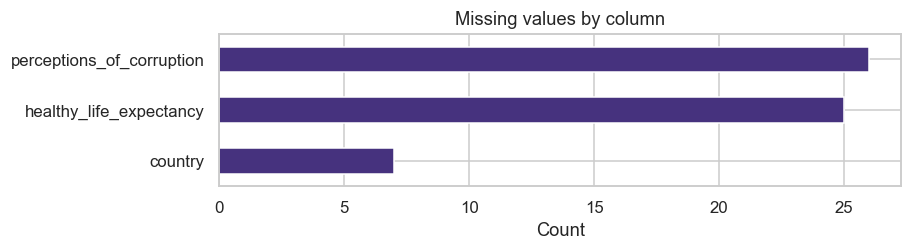

In [8]:
exp.missing(plot=True)

Saved: artifacts\eda\histograms.png


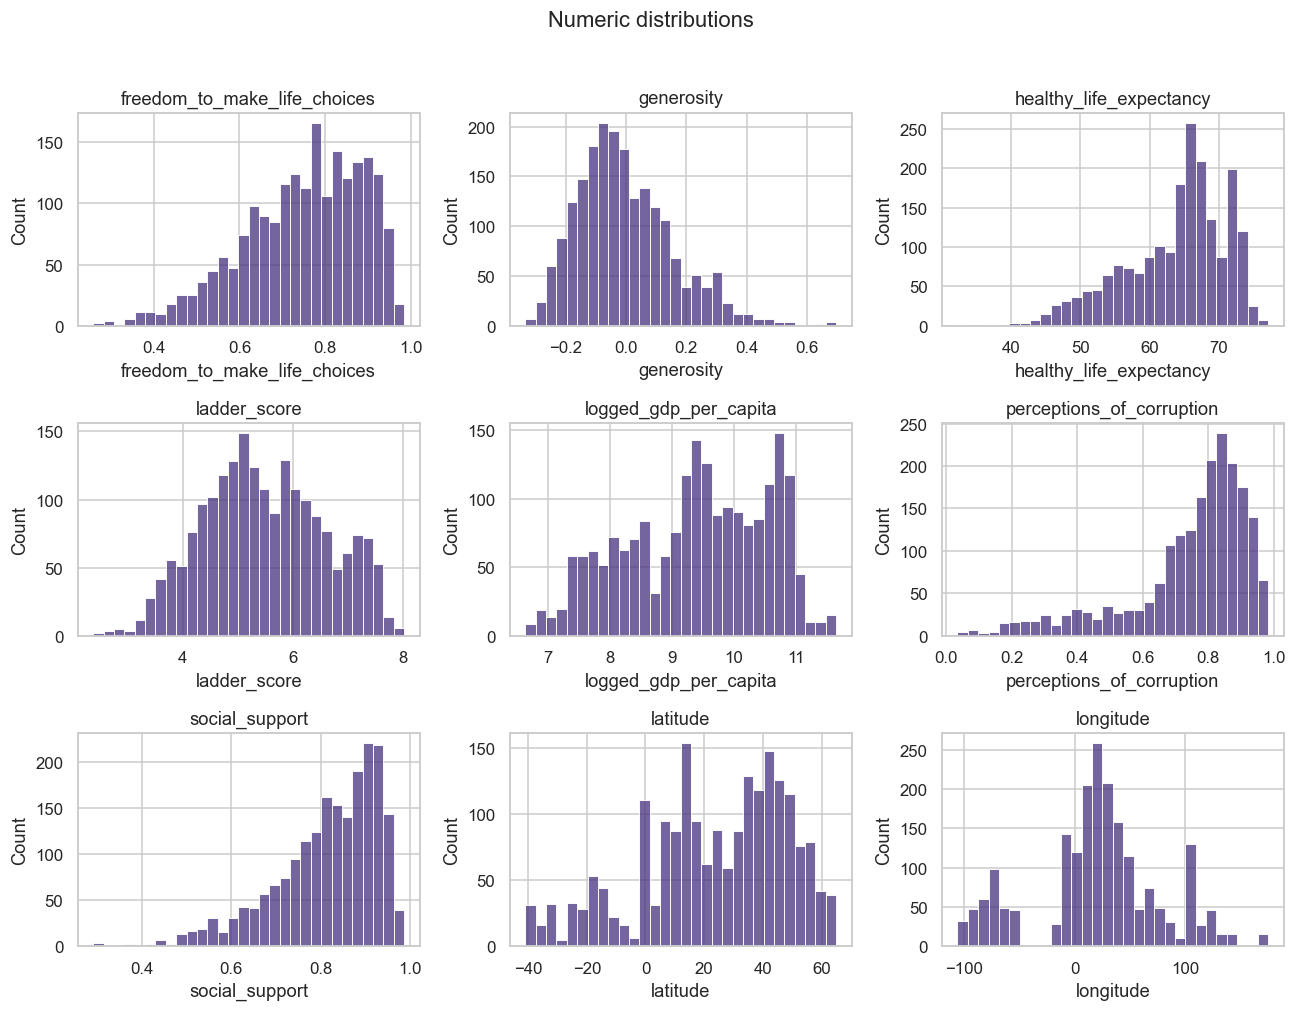

In [9]:
exp.histograms(exclude=["year",], bins=30)

Saved: artifacts\eda\boxplots.png


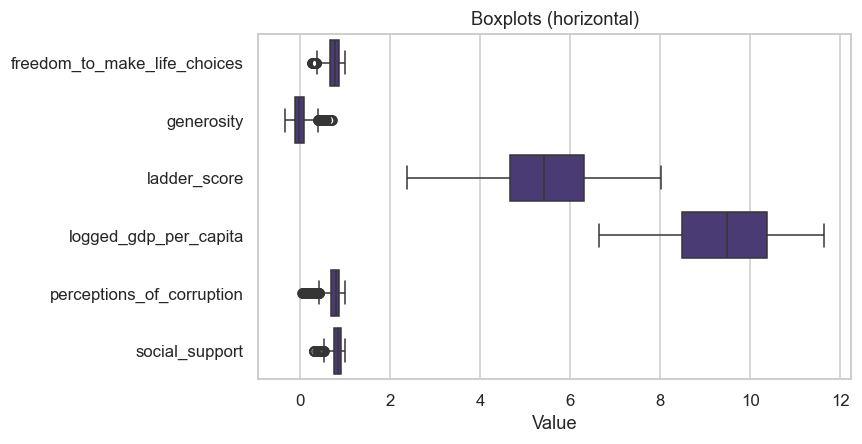

In [10]:
exp.boxplots(exclude=["healthy_life_expectancy", "year", "latitude", "longitude"])

Saved: artifacts\eda\correlations_pearson.png


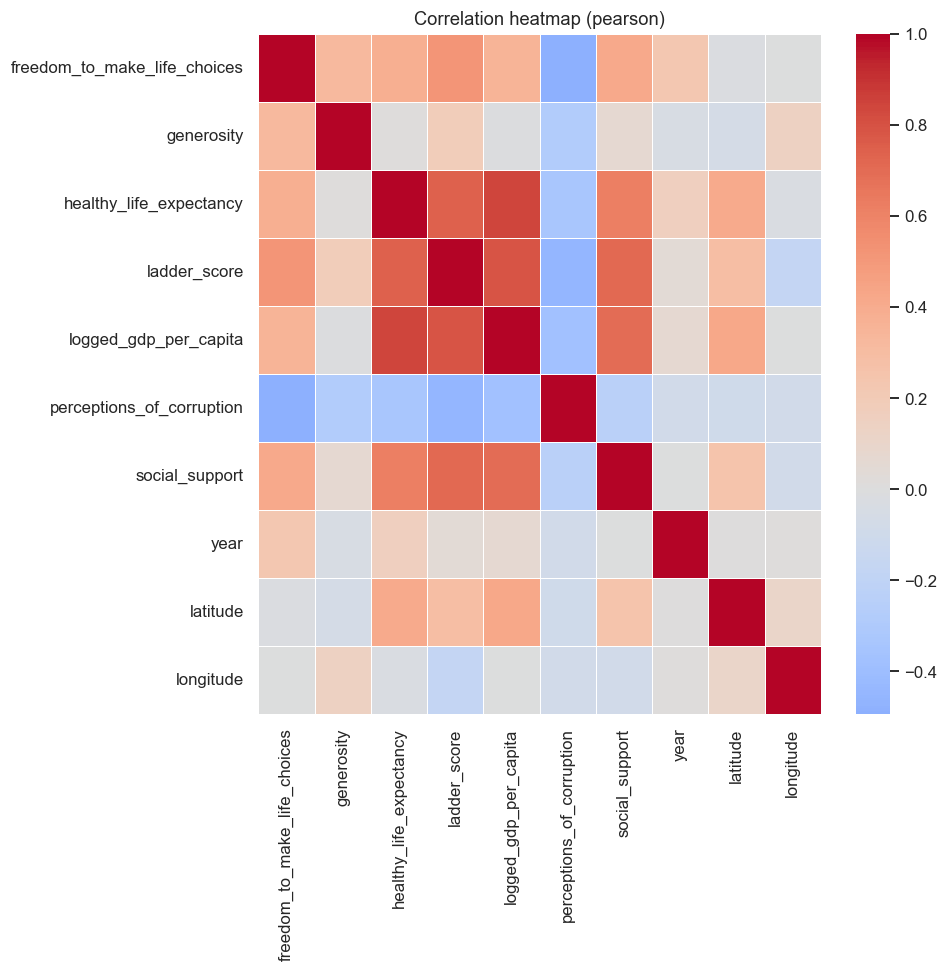

In [11]:
exp.correlations(method="pearson", top_k=15)

Saved: artifacts\eda\geo_scatter.png


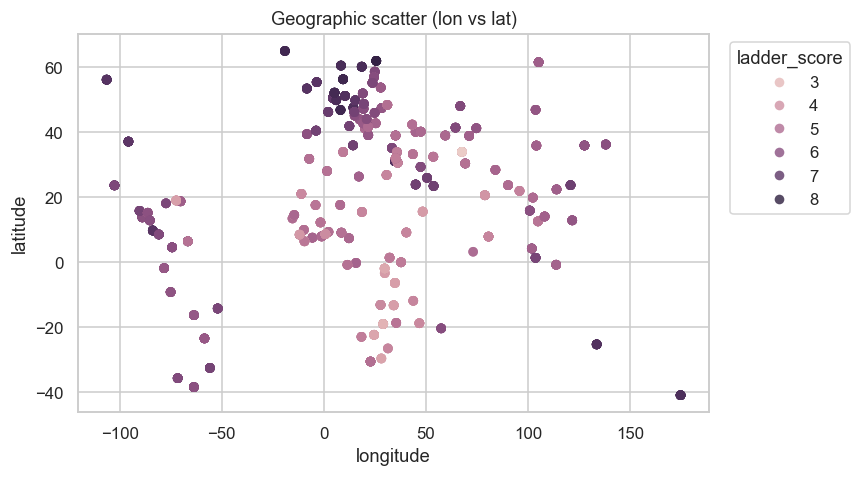

In [12]:
exp.geo_scatter(hue="ladder_score" if "ladder_score" in gold_df.columns else None)